---
# CONTENTS
- I. Collaborative Filtering
- II. About Dataset
- 1. Matrix Factorization Apporach for Book Recommendation
- 2. Neural Collaborative Filtering Apporach for Book Recommendation
----


# I. Collaborative Filtering

Collaborative filtering recommenders make suggestions based on how users rated in the past and not based on the product themselves. It only knows how other customers rated the product. “Similarity” is measured against the similarity of users.

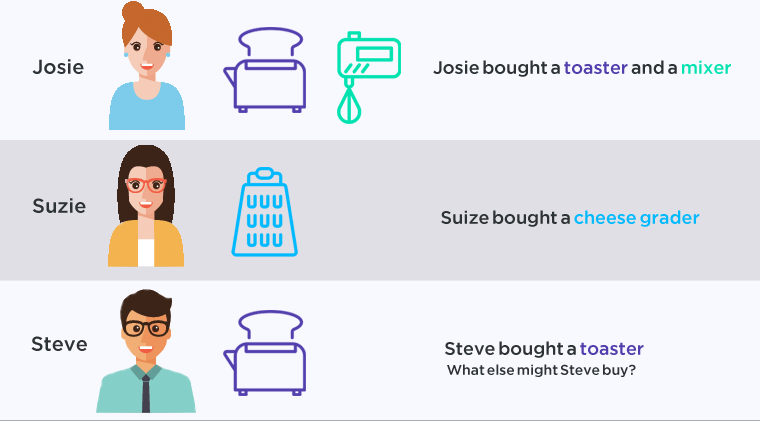

To explain collaborative filtering clearly, here is an example:

#### PREDICTED USER RATING Table
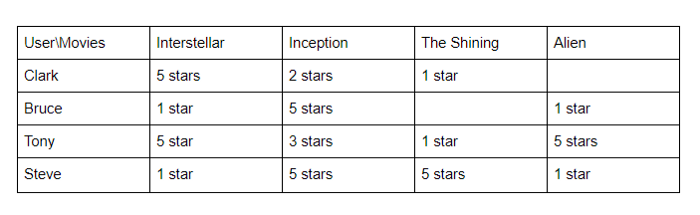

As we can see from above Clark and Tony have similar tastes as they rated movies similarly. 

#### PREDICTED USER RATING
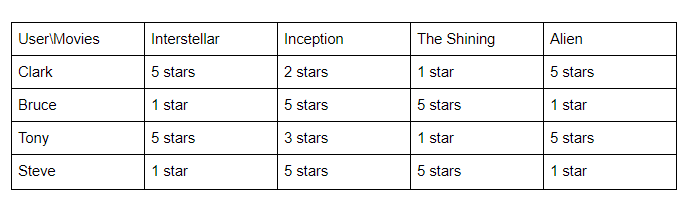

Clark is recommended "Alien" from Tony because of their similarity in rating. Bruce was suggested "The Shining" because Steve rated it highly.

*Advantages:*

- No requirement for product descriptions.

*Disadvantages:*

- Can’t recommend items if no user reviews exist (suffers from the cold start problem).
- Difficult to recommend new users and is inclined to favor popular products with lots of reviews.
- Suffers from a sparsity problem as the user will review only selected items.
- Faces the "gray sheep problem" (i.e., useful predictions cannot be made due to sparsity).
- Difficult to recommend new releases since they have less reviews.



### SINGULAR VALUE DECOMPOSITION (SVD)

Most collaborative recommender systems perform poorly when dimensions in data increases (i.e., they suffer from the curse of dimensionality). It is a good idea to reduce the number of features while retaining the maximum amount of information. Reducing the features is called dimensionality reduction. Often while reducing we can get a useful part of the data, that is hidden correlation (latent factors) and remove redundant parts. There are many dimensionality reduction algorithms such as principal component analysis (PCA) and linear discriminant analysis (LDA), but SVD is used mostly in the case of recommender systems. SVD uses matrix factorization to decompose matrices.

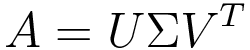

In the case above, A matrix(m*n) can be decomposed into U(m*m) orthogonal matrix, Σ(m*n) non-negative diagonal matrix, and V (n*n) orthogonal matrix

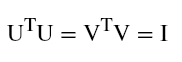

U is also referred to as the left singular vectors, Σ as singular values, and V as right singular vectors

Let’s take the example of movies rated by users in matrix A:

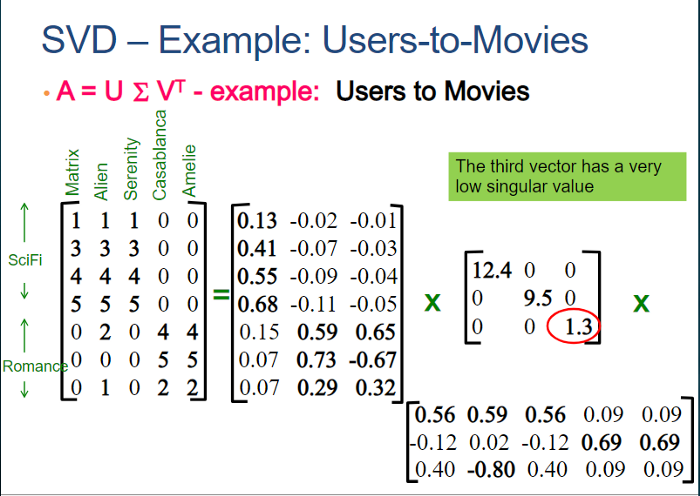

For U it shows user’s similarity to movie genres, so the first column of U represents weights that would match each user’s preference to the science fiction category. We can see that the fourth user rates the sci-fi category highly. While the second column of U represents weights that match each user’s preference to the romance category. We can see that the sixth user rates the romance category highly. For the third column, we need to look at the Σ value given.

For Σ, the first diagonal entry represents the weight (strength) of the sci-fi category (12.4) and the second diagonal entry represents the weight (strength) of the romance category (9.5). And as for the third diagonal entry, it is considered noise because the value is lower compared to other diagonal entries.

For V, the columns show the similarity of movies to a category. So, we can see from the first column of V that the first movie belongs to the sci-fi (0.56) category. Similarly, since the third row is discarded as noise the second movie also belongs to the sci-fi category.

After eliminating the third column from U, third row and third column from Σ, and third row, we get the below matrices.

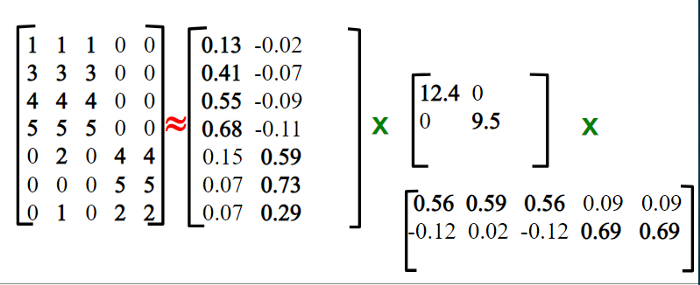

We have reduced the initial UΣV dimension, so to check if we've lost any information we need to multiply all three matrices.

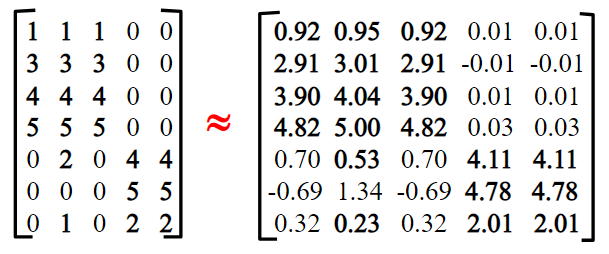

After multiplying we see there is very little loss of information as the elements of a matrix are very similar. It is similarly used for predicting missing values among ratings and suggesting high ratings to the user.

So this is how we decompose a matrix without losing much of the important data and It helps to analyze and acquire important information concerning the matrix data.

-----
# II. Book Recommendation Dataset

### Context

During the last few decades, with the rise of Youtube, Amazon, Netflix and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. As a proof of the importance of recommender systems, we can mention that, a few years ago, Netflix organised a challenges (the “Netflix prize”) where the goal was to produce a recommender system that performs better than its own algorithm with a prize of 1 million dollars to win.

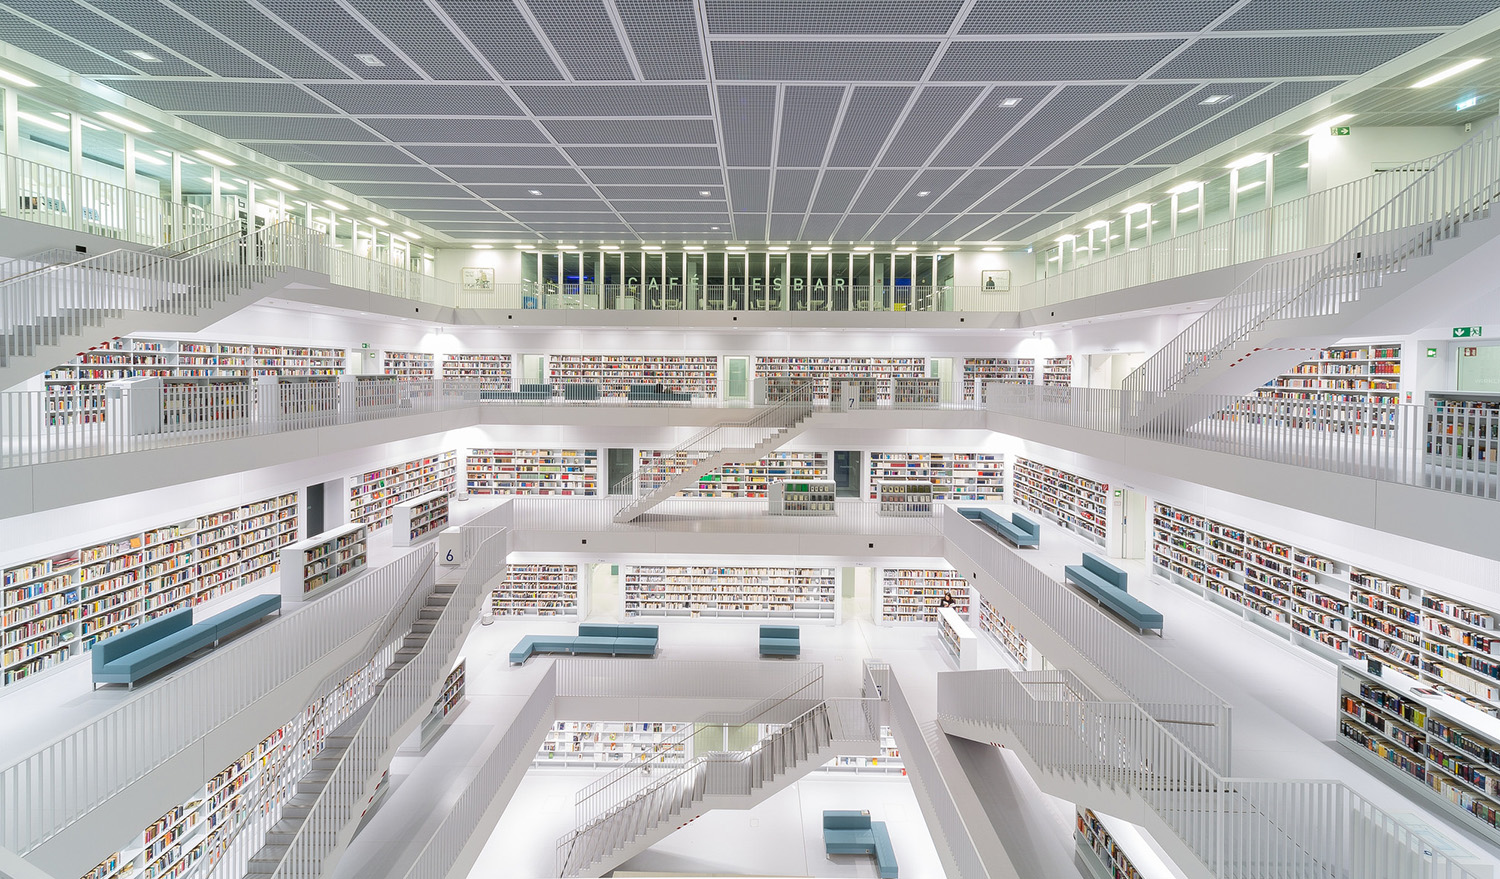

Image: Stuttgart City Library | Stuttgart, Germany, PHOTO: DIETER WEINELT, FLICKR

## About Dataset
The Book-Crossing dataset comprises 3 files.

Users
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.
Books
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.
Ratings
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.


## Acknowledgements
Collected by Cai-Nicolas Ziegler in a 4-week crawl (August / September 2004) from the Book-Crossing community with kind permission from Ron Hornbaker, CTO of Humankind Systems. Contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books.

## More Readings
[Deep Learning based Recommender System: A Survey and New Perspectives](https://arxiv.org/pdf/1707.07435.pdf).

----

**1# Matrix Factorization for Book Recommendations**
=====================================================

**Approach**
------------

#### Matrix Factorization

* Matrix factorization is a technique used to reduce the dimensionality of a large matrix.
* In this code, matrix factorization is used to perform collaborative filtering on the user-book rating matrix.

#### Singular Value Decomposition (SVD)

* SVD is a technique used to factorize a matrix into three matrices: U, Σ, and V.
* In this code, SVD is used to perform matrix factorization on the user-book rating matrix.

#### Data Preparation

* Create a dictionary to map ISBN to unique ID
* Assign unique ID to each book
* Create a pivot matrix with user-book ratings

#### Matrix Factorization

* Perform matrix factorization using SVD
* Compute predicted ratings using the factorized matrices

#### Evaluation

* Calculate the root mean squared error (RMSE) between the actual and predicted ratings

#### Recommendation Generation


#### Top-N Similar Books

* Define a function to compute the top-N similar books for a given book using cosine similarity
* Define a function to print the similar books with their titles, authors, and ISBNs

#### Example Usage

* Compute the top-N similar books for a given book with ISBN ID 2
* Print the similar books with their titles, authors, and ISBNs

In [112]:
import numpy as np
import pandas as pd

book_df = pd.read_csv('./Data/Books.csv', low_memory=False)
ratings_df = pd.read_csv('./Data/Ratings.csv').sample(40000)
user_df = pd.read_csv('./Data/Users.csv')
user_rating_df = ratings_df.merge(user_df, left_on = 'User-ID', right_on = 'User-ID')

## Preprocessng

In [113]:
# Merge book_df and user_rating_df on "ISBN"
book_user_rating = book_df.merge(user_rating_df, on='ISBN')

# Select desired columns from the merged DataFrame
desired_columns = ['ISBN', 'Book-Title', 'Book-Author', 'User-ID', 'Book-Rating']
book_user_rating = book_user_rating[desired_columns]

# Reset index (dropping old index and creating a new numerical one from 0)
book_user_rating = book_user_rating.reset_index(drop=True)

In [114]:
book_user_rating.head()

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2,0
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,137688,0
2,080652121X,Hitler's Secret Bankers: The Myth of Swiss Neu...,Adam Lebor,8,0
3,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver,35826,0
4,0440234743,The Testament,John Grisham,78973,7


In [120]:
import numpy as np
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error

# Create a dictionary to map ISBN to unique ID (to reduce dimensionality)
isbn_to_id = {isbn: i for i, isbn in enumerate(book_user_rating['ISBN'].unique())}

# Assign unique ID to each book (replace ISBN with unique ID)
book_user_rating['unique_id_book'] = book_user_rating['ISBN'].map(isbn_to_id)

# Create a pivot matrix with user-book ratings (users as rows, books as columns, ratings as values)
pivot_matrix = book_user_rating.pivot(index='User-ID', columns='unique_id_book', values='Book-Rating').fillna(0)

# Perform matrix factorization (reduce dimensionality of user-book matrix)
U, sigma, Vt = svds(pivot_matrix.values, k=15)

# Compute predicted ratings (dot product of U, sigma, and Vt)
predicted_ratings = np.dot(np.dot(U, np.diag(sigma)), Vt)

# Calculate RMSE (root mean squared error) between actual and predicted ratings
actual_ratings = pivot_matrix.values
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
print(f"RMSE: {rmse:.4f}")

# Define a function to compute top cosine similarity between books
def top_cosine_similarity(data, book_id, top_n=10):
    # Get the book row from the data matrix
    book_row = data[book_id, :]
    # Compute magnitude (norm) of each row in the data matrix
    magnitude = np.linalg.norm(data, axis=1)
    # Avoid division by zero by setting small values to 1e-8
    magnitude[magnitude < 1e-8] = 1e-8
    # Compute cosine similarity between book row and all other rows
    similarity = np.dot(book_row, data.T) / (magnitude[book_id] * magnitude)
    # Return top N indices with highest similarity
    return np.argsort(-similarity)[:top_n]

# Define a function to print similar books
def similar_books(data, book_id, top_indices):
    # Get book info from the original data
    book_info = data.iloc[book_id]
    # Initialize list to store similar books
    similar_books_list = []
    # Loop through top indices and get similar book info
    for i in top_indices:
        similar_book_info = data.iloc[i]
        similar_books_list.append({
            'Book-ISBN': similar_book_info['ISBN'],
            'Book-Title': similar_book_info['Book-Title'],
            'Book-Author': similar_book_info['Book-Author']
        })
    # Print header and similar books
    print(f"For the book '{book_info['Book-Title']}' by {book_info['Book-Author']} (ISBN: {book_info['ISBN']}), the top {len(top_indices)} similar books are:")
    for book in similar_books_list:
        print(f"- '{book['Book-Title']}' by {book['Book-Author']} (ISBN: {book['Book-ISBN']})")

# Set parameters for similar book recommendation
k = 50
ISBN_id = 2
top_n = 3

# Slice the Vt matrix to reduce dimensionality
sliced = Vt.T[:, :k]

# Compute top similar indices for the given book ID
top_similar_indices = top_cosine_similarity(sliced, ISBN_id, top_n)

# Print similar books for the given book ID
similar_books(book_user_rating, ISBN_id, top_similar_indices)

RMSE: 0.0478
For the book 'Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust' by Adam Lebor (ISBN: 080652121X), the top 3 similar books are:
- 'Interview with the Vampire' by Anne Rice (ISBN: 0345337662)
- 'New Attitude' by Charlotte Hughes (ISBN: 1551668637)
- 'The Summerhouse' by Jude Deveraux (ISBN: 0671014196)


--------------------------------------------------------------------------------------------------------

**#2 Neural Collaborative Filtering for Book Recommendations**
============================================================

**Approach**
------------

#### Collaborative Filtering (CF)

* CF is a recommendation technique that suggests items to users based on the behavior or preferences of similar users.
* In this code, CF is used to model the interactions between users and books.

#### Neural Networks

* The code uses a neural network to learn the complex relationships between users and books.
* The neural network takes in user and book IDs as input and outputs a predicted rating.

#### Embeddings

* The code uses **embeddings** to convert the user and book IDs into dense vectors.
* These embeddings capture the latent features of users and books, allowing the model to learn complex relationships between them.

#### Model Architecture

* The model consists of two input layers (user and book IDs), two embedding layers, two dense layers, and an output layer.
* The embedding layers convert the user and book IDs into dense vectors.
* The dense layers learn to combine the user and book embeddings to predict a rating.

#### Training

* The model is trained on the training data using the mean squared error (MSE) loss function and the Adam optimizer.
* Early stopping is used to prevent overfitting.

#### Recommendation Generation

* To generate recommendations for a user, the model predicts ratings for all books the user hasn't rated yet.
* The books are then ranked by their predicted ratings, and the top-N recommended books are returned.

This approach is known as **Neural Collaborative Filtering** (NCF) and has been shown to be effective in various recommendation tasks.

In [106]:
df_book = book_user_rating.copy()

In [117]:
# Filter rows where "Book-Title" is "Interview with the Vampire"
filtered_df = df_book[df_book['Book-Title'] == "Interview with the Vampire"]
filtered_df

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating,unique_id_book,book_id,user_id
3590,0345337662,Interview with the Vampire,Anne Rice,148744,0,1040,1040,1473
3591,0345337662,Interview with the Vampire,Anne Rice,188010,0,1040,1040,2011
3592,0345337662,Interview with the Vampire,Anne Rice,16599,8,1040,1040,2673
3593,0345337662,Interview with the Vampire,Anne Rice,260897,0,1040,1040,626
3594,0345337662,Interview with the Vampire,Anne Rice,268622,0,1040,1040,1822
3595,0345337662,Interview with the Vampire,Anne Rice,26544,0,1040,1040,187
3596,0345337662,Interview with the Vampire,Anne Rice,215421,0,1040,1040,2674
3597,0345337662,Interview with the Vampire,Anne Rice,3827,7,1040,1040,2675
3598,0345337662,Interview with the Vampire,Anne Rice,225989,0,1040,1040,2676
3599,0345337662,Interview with the Vampire,Anne Rice,254971,0,1040,1040,1712


In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Embedding, Input, Dense, concatenate
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.optimizers import legacy

# Create a unique ID for each book (to reduce dimensionality)
book_id_map = {isbn: i for i, isbn in enumerate(df_book['ISBN'].unique())}
df_book['book_id'] = df_book['ISBN'].map(book_id_map)

# Create a unique ID for each user (to reduce dimensionality)
user_id_map = {user_id: i for i, user_id in enumerate(df_book['User-ID'].unique())}
df_book['user_id'] = df_book['User-ID'].map(user_id_map)

# Split the data into training and testing sets (80% for training, 20% for testing)
train_df, test_df = train_test_split(df_book, test_size=0.2, random_state=42)

# Create the input and output arrays for training
train_user_ids = train_df['user_id'].values
train_book_ids = train_df['book_id'].values
train_ratings = train_df['Book-Rating'].values

# Create the input and output arrays for testing
test_user_ids = test_df['user_id'].values
test_book_ids = test_df['book_id'].values
test_ratings = test_df['Book-Rating'].values

# Define the embedding dimensions for users and books
user_embedding_dim = 32
book_embedding_dim = 32

# Define the model architecture
user_input = Input(shape=(1,), name='user_input')
book_input = Input(shape=(1,), name='book_input')

# Embedding layers for users and books
user_embedding = Embedding(input_dim=len(user_id_map), output_dim=user_embedding_dim, embeddings_regularizer=l2(0.01), input_length=1, name='user_embedding')(user_input)
book_embedding = Embedding(input_dim=len(book_id_map), output_dim=book_embedding_dim, embeddings_regularizer=l2(0.01), input_length=1, name='book_embedding')(book_input)

# Concatenate user and book embeddings
concatenated = concatenate([user_embedding, book_embedding])

# Dense layers for rating prediction
x = Dense(64, activation='relu')(concatenated)
x = Dense(32, activation='relu')(x)
output = Dense(1)(x)

# Define the model
model = Model(inputs=[user_input, book_input], outputs=output)

# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mean_squared_error', optimizer=legacy.Adam(learning_rate=0.001))

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)

# Train the model
model.fit([train_user_ids, train_book_ids], train_ratings, epochs=20, batch_size=256, validation_data=([test_user_ids, test_book_ids], test_ratings), callbacks=[early_stopping], verbose=0)

# Make predictions on the test data
predictions = model.predict([test_user_ids, test_book_ids])

# Calculate RMSE on test data
mse_test = mean_squared_error(test_ratings, predictions.flatten())
rmse_test = sqrt(mse_test)
print(f'Test RMSE: {rmse_test:.4f}')

# Define a function to get top recommended books for a user
def get_top_recommended_books(user_id, num_recommended=3):
    # Create input arrays for the user and all books
    user_id_array = np.array([user_id] * len(book_id_map))
    book_id_array = np.array(list(book_id_map.values()))
    
    # Make predictions for the user and all books
    predictions = model.predict([user_id_array, book_id_array])
    predictions = predictions.flatten()
    
    # Get top N recommended books
    top_indices = np.argsort(-predictions)[:num_recommended]
    recommended_books = []
    for i in top_indices:
        book_id = list(book_id_map.keys())[list(book_id_map.values()).index(i)]
        book_title = df_book[df_book['ISBN'] == book_id]['Book-Title'].values[0]
        book_author = df_book[df_book['ISBN'] == book_id]['Book-Author'].values[0]
        recommended_books.append(f'\'{book_title}\' by {book_author} (ISBN: {book_id})')
    return recommended_books

# Example usage: get top 3 recommended books for user 621
user_id = 621
top_recommended_books = get_top_recommended_books(user_id)
print(f'Top {len(top_recommended_books)} recommended books for user {user_id}:')
for book in top_recommended_books:
    print(book)

226/226 [==============================] - 0s 261us/step
Test RMSE: 3.8321
821/821 [==============================] - 0s 243us/step
Top 3 recommended books for user 621:
'White Oleander : A Novel (Oprah's Book Club)' by Janet Fitch (ISBN: 0316284955)
'Hard Time (V.I. Warshawski Novels (Paperback))' by SARA PARETSKY (ISBN: 0440224705)
'The Key to Midnight' by Dean R. Koontz (ISBN: 0425147517)
